In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis

In [3]:
data.shape

(1599, 12)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#All dtypes are simliar and label is in int
# Here we can see there is no null value as well as missing values
#Now we are going to see the statistics of data set by using describe method

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Now we can see outlier by using boxplot that shows outlier present in data set.

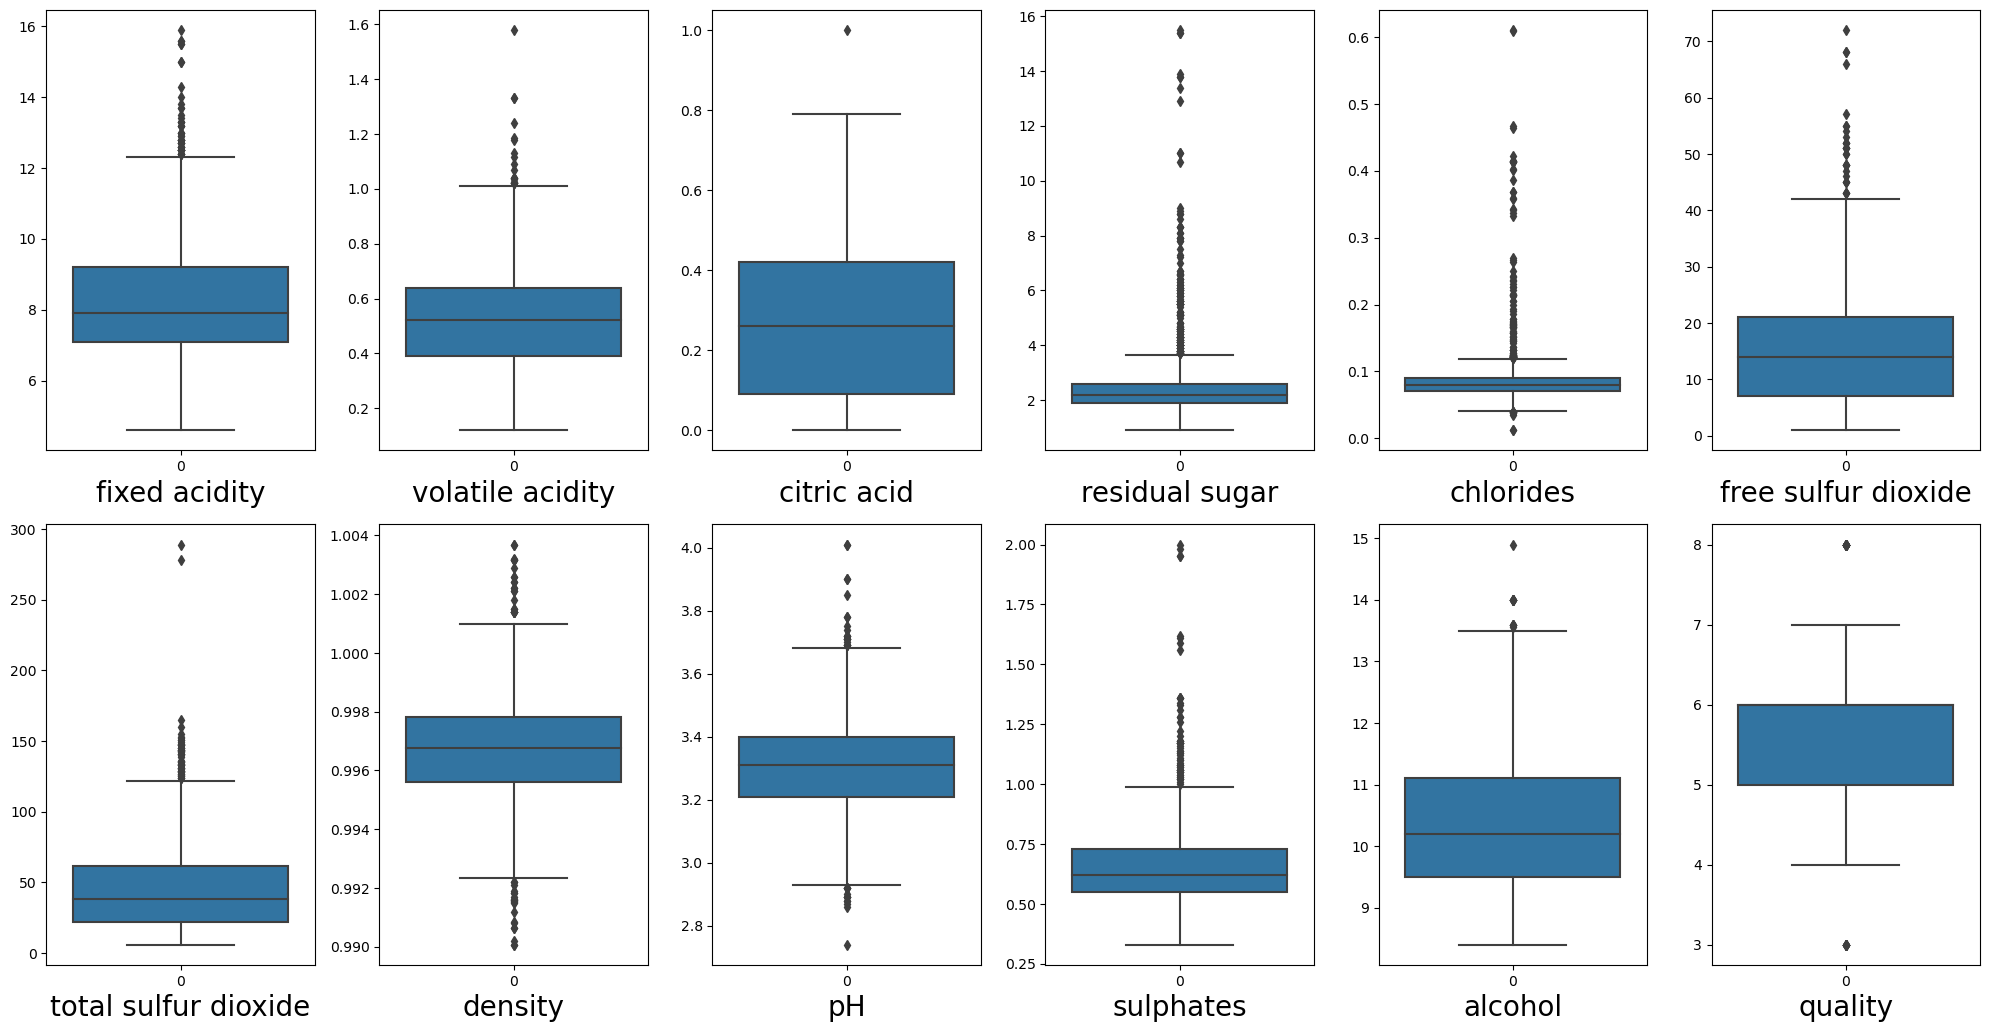

In [8]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=13:
        plt.subplot(3,6,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

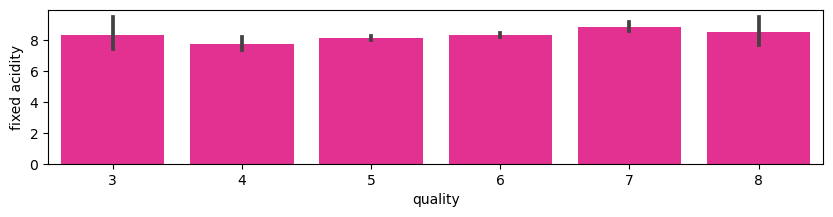

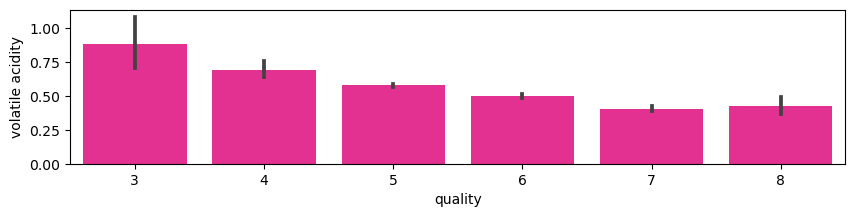

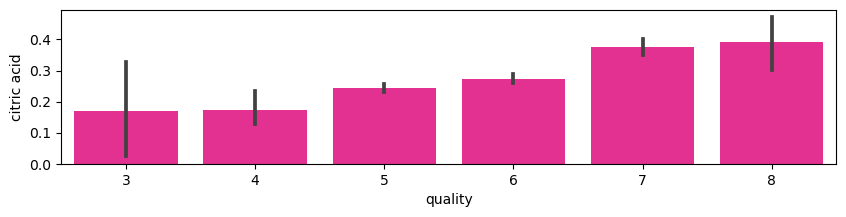

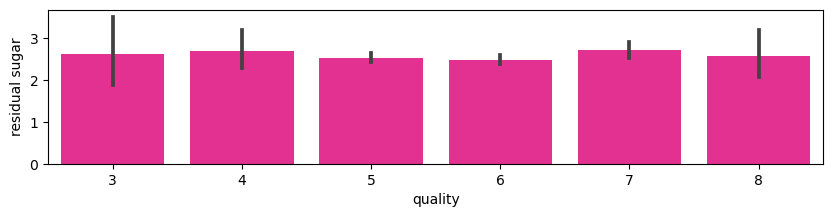

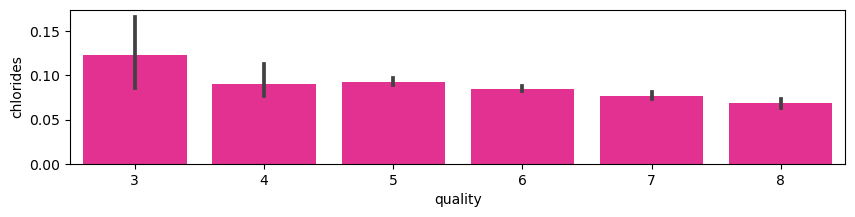

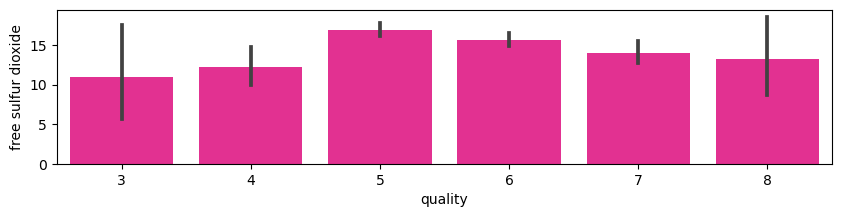

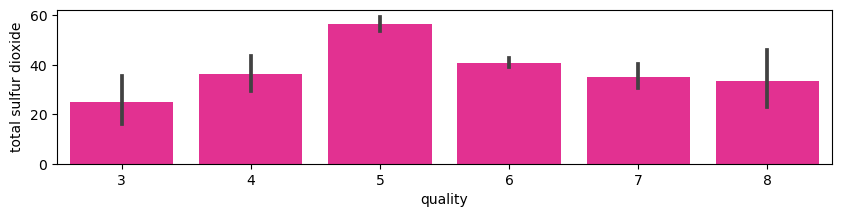

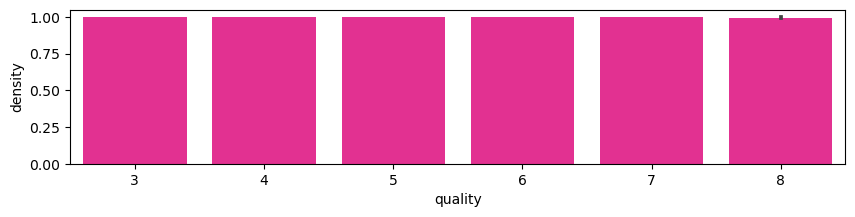

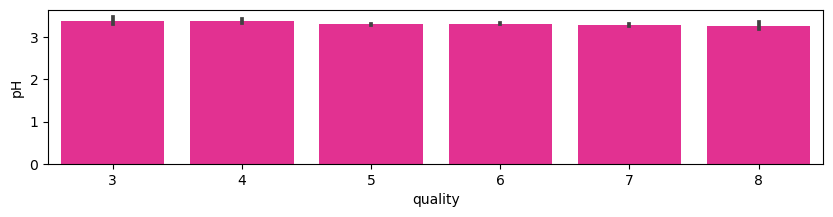

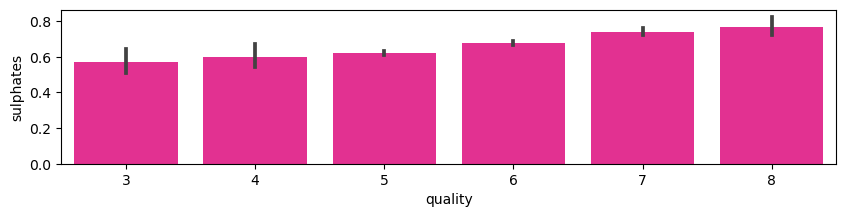

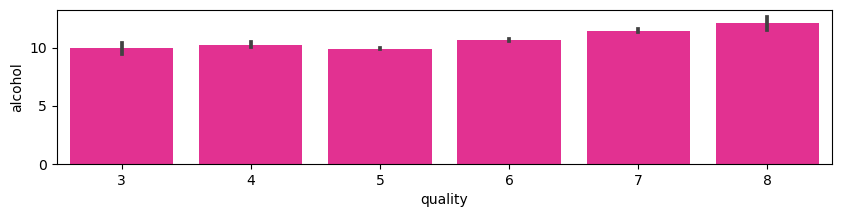

In [9]:
index=0
labels = data['quality']
features = data.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,2))
    sns.barplot(x=labels, y=col[index], data=data, color="deeppink")
plt.show()

we can see here citric acid,sulphate and alcohol have strong realtion to the label because they are going in upward
direction and all the remaining are increasing or decreasing thats shows data is imbalanced


# outliers remove

In [10]:
data.shape

(1599, 12)

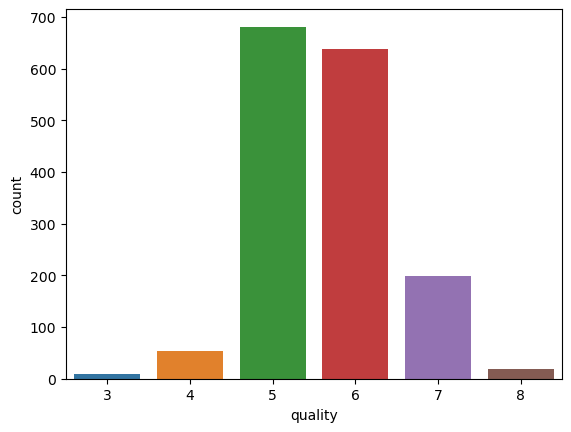

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
#check data is balanced or imbalanced by using countpolt
sns.countplot(x='quality',data=data)
plt.show()
data.quality.value_counts()

In [12]:
#here we can see our data set is imbalaced ,it willbe baised when prediction we need to treat it accordingly
#using Z score for removing outliers

In [13]:
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data=data[(z<3).all(axis=1)]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
data.shape

(1451, 12)

In [15]:
data.quality.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [16]:
#Here we can see that our label column data is imbalanced we need to treat it by using oversampling method

In [17]:
#now splitting data into two parts
X = data.drop('quality', axis=1)
Y = data['quality']

In [18]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [19]:
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

In [20]:
data.shape

(1451, 12)

In [21]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

In [22]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
X_scaled.shape[1]

11

In [24]:
#checking multicollinearity by using vif score

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,7.673819,fixed acidity
1,2.313268,volatile acidity
2,4.263623,citric acid
3,1.733300,residual sugar
4,1.211778,chlorides
5,2.113804,free sulfur dioxide
6,2.350722,total sulfur dioxide
7,6.544437,density
8,3.579014,pH
9,1.555017,sulphates


In [27]:
#as we can see that there are multicollinearity we going to remove those features are more score than 5
X=X.drop('fixed acidity',axis=1)

In [28]:
X=X.drop('density',axis=1)

In [29]:
X

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
1,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,3.200000,0.680000,9.800000
2,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,3.260000,0.650000,9.800000
3,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,3.160000,0.580000,9.800000
4,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...
3080,0.371853,0.357717,2.023277,0.057862,13.952555,29.000000,3.189266,0.766983,11.125426
3081,0.418958,0.584812,2.038581,0.066552,7.210642,40.904648,3.017206,0.820000,10.425498
3082,0.386807,0.493193,2.580628,0.071162,5.581161,16.193720,3.159686,0.663560,11.406812
3083,0.353924,0.397208,2.893595,0.076430,15.784895,31.898186,3.306831,0.797208,12.250574


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [31]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [32]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.81685575364668

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       375
           1       0.84      0.88      0.86       242

    accuracy                           0.89       617
   macro avg       0.88      0.89      0.88       617
weighted avg       0.89      0.89      0.89       617

Cross Validation Score: 88.29821717990276

Accuracy Score - Cross Validation Score is 0.5186385737439139


In [33]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 88.97893030794165

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       375
           1       0.83      0.90      0.87       242

    accuracy                           0.89       617
   macro avg       0.88      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617

Cross Validation Score: 87.77957860615884

Accuracy Score - Cross Validation Score is 1.1993517017828168


In [34]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 91.73419773095624

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       375
           1       0.90      0.89      0.89       242

    accuracy                           0.92       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.92      0.92      0.92       617

Cross Validation Score: 89.33549432739059

Accuracy Score - Cross Validation Score is 2.398703403565648


In [35]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.67909238249594

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       375
           1       0.91      0.93      0.92       242

    accuracy                           0.94       617
   macro avg       0.93      0.94      0.93       617
weighted avg       0.94      0.94      0.94       617

Cross Validation Score: 92.96596434359805

Accuracy Score - Cross Validation Score is 0.7131280388978922


In [36]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 82.82009724473258

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       375
           1       0.76      0.81      0.79       242

    accuracy                           0.83       617
   macro avg       0.82      0.83      0.82       617
weighted avg       0.83      0.83      0.83       617

Cross Validation Score: 80.45380875202592

Accuracy Score - Cross Validation Score is 2.3662884927066585


In [37]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.13776337115073

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       375
           1       0.92      0.96      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617

Cross Validation Score: 93.67909238249595

Accuracy Score - Cross Validation Score is 1.4586709886547737


In [38]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [39]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
GSCV.best_params_ 

In [ ]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

In [ ]:
fpr,tpr,threshold=roc_curve(Y_test,fmod_pred)